# EDA with Time Series

## Objective

* Date time index
* Extract Date feature
* Time resampling
    1. year end Frequency (rule = 'A')
    2. Quaterly start frequency (rule = 'QS')
    3. Business End frequency (rule = 'BA')
    4. Business Quater start frequency (rule = 'BQS')
* visualization
* Rolling

##### Import relevant libraries

In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [3]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-31,22.129999,21.345333,21.348667,22.101999,85084500.0,22.101999
2017-11-01,22.174000,21.350668,22.150000,21.405333,126859500.0,21.405333
2017-11-02,20.579332,19.508667,20.008667,19.950666,296871000.0,19.950666
2017-11-03,20.416668,19.675333,19.966667,20.406000,133410000.0,20.406000
2017-11-06,20.500000,19.934000,20.466667,20.185333,97290000.0,20.185333


<AxesSubplot:xlabel='Date'>

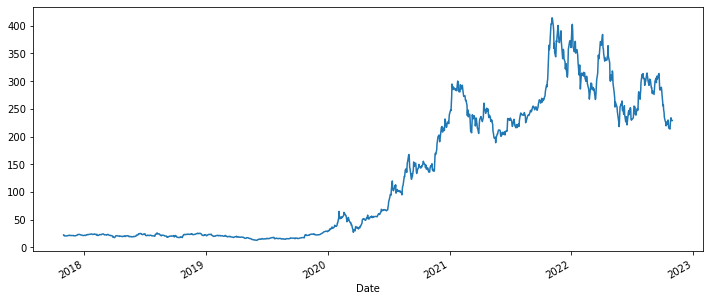

In [4]:
df_tesla['High'].plot(figsize = (12,5))

<AxesSubplot:xlabel='Date'>

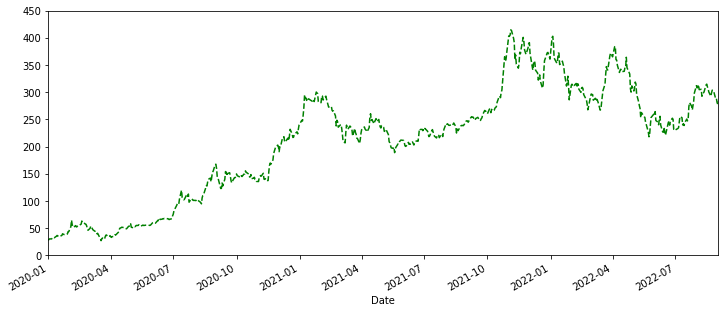

In [5]:
#x-limit and y-limit and coloring
df_tesla['High'].plot(xlim = ['2020-01-01','2022-09-01'],ylim = [0,450],figsize = (12,5),color = 'green', ls = '--')

In [6]:
index = df_tesla.loc['2020-01-01':'2022-09-01'].index

In [7]:
share_open = df_tesla.loc['2020-01-01':'2022-09-01']['Open']

In [8]:
r = share_open.reset_index()
r.columns=['date-wise','open_prices']

In [9]:
r

,date-wise,open_prices
0,2020-01-02,28.299999
1,2020-01-03,29.366667
2,2020-01-06,29.364668
3,2020-01-07,30.760000
4,2020-01-08,31.580000
...,...,...
668,2022-08-26,297.429993
669,2022-08-29,282.829987
670,2022-08-30,287.869995
671,2022-08-31,280.619995


In [10]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2022-08-26    297.429993
2022-08-29    282.829987
2022-08-30    287.869995
2022-08-31    280.619995
2022-09-01    272.579987
Name: Open, Length: 673, dtype: float64

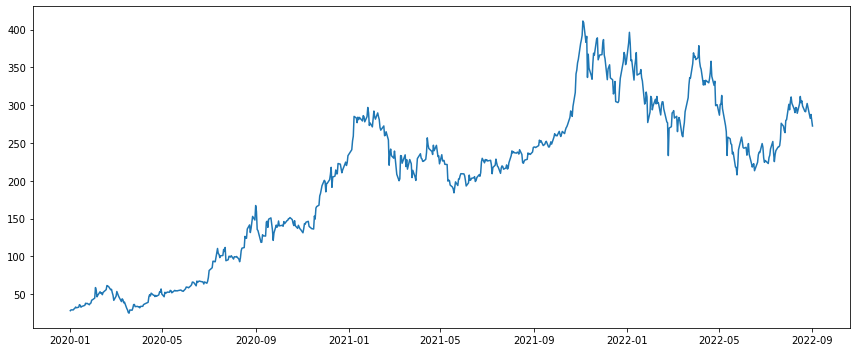

In [11]:
figure,axis = plt.subplots(figsize = (12,5)) 
#figure.autofmt_xdate() #prevent overlapping
axis.plot(index,share_open)
plt.tight_layout()

## DateTime Index

In [12]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-10-31 to 2022-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 101.1 KB


In [13]:
df_tesla = df_tesla.reset_index()

In [14]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [15]:
#to set index as per as your desired column
df_tesla = df_tesla.set_index('Date')

In [16]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-31,22.129999,21.345333,21.348667,22.101999,85084500.0,22.101999
2017-11-01,22.174000,21.350668,22.150000,21.405333,126859500.0,21.405333
2017-11-02,20.579332,19.508667,20.008667,19.950666,296871000.0,19.950666
2017-11-03,20.416668,19.675333,19.966667,20.406000,133410000.0,20.406000
2017-11-06,20.500000,19.934000,20.466667,20.185333,97290000.0,20.185333


## Extract Date feature

In [17]:
datetime.now()

datetime.datetime(2022, 10, 31, 19, 16, 31, 129954)

In [18]:
date = datetime(2022,10,31)

In [19]:
date

datetime.datetime(2022, 10, 31, 0, 0)

In [20]:
date.date()

datetime.date(2022, 10, 31)

In [21]:
date.day

31

In [22]:
date.weekday()

0

In [23]:
date.month

10

In [24]:
date.year

2022

In [25]:
date.min

datetime.datetime(1, 1, 1, 0, 0)

# Time Resampling

In [26]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-31,22.129999,21.345333,21.348667,22.101999,85084500.0,22.101999
2017-11-01,22.174000,21.350668,22.150000,21.405333,126859500.0,21.405333
2017-11-02,20.579332,19.508667,20.008667,19.950666,296871000.0,19.950666
2017-11-03,20.416668,19.675333,19.966667,20.406000,133410000.0,20.406000
2017-11-06,20.500000,19.934000,20.466667,20.185333,97290000.0,20.185333


### Rule = 'A' means year end Frequency

In [27]:
df_tesla.resample(rule ='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,20.297333,19.508667,19.966667,19.950666,48661500.0,19.950666
2018-12-31,17.355333,16.306000,16.851999,16.704000,46210500.0,16.704000
2019-12-31,12.445333,11.799333,12.073333,11.931333,36984000.0,11.931333
2020-12-31,26.990667,23.367332,24.980000,24.081333,52073100.0,24.081333
2021-12-31,188.736664,179.830002,184.183334,187.666672,29401800.0,187.666672
2022-12-31,213.500000,198.589996,205.820007,204.990005,6807613.0,204.990005


In [28]:
df_tesla.resample(rule ='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,23.162666,22.505333,22.993334,22.896667,296871000.0,22.896667
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-31,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


<AxesSubplot:xlabel='Date'>

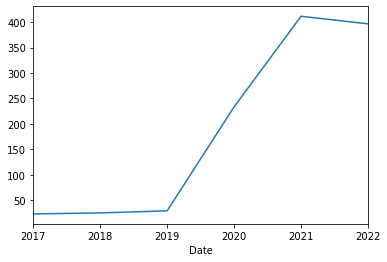

In [29]:
df_tesla.resample(rule ='A').max()['Open'].plot() 

### Quaterly start frequency

<AxesSubplot:xlabel='Date'>

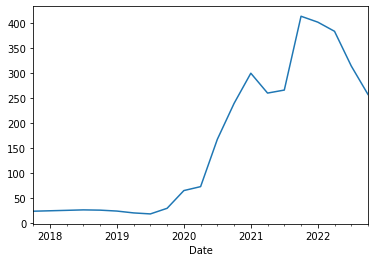

In [30]:
df_tesla.resample(rule ='QS').max()['High'].plot()

### Business End frequency

In [31]:
# Business End frequency
df_tesla.resample(rule ='BA').max()#['High'].plot()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,23.162666,22.505333,22.993334,22.896667,296871000.0,22.896667
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-30,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


### Business Quater start frequency

In [32]:
# Business Quater start frequency
df_tesla.resample(rule ='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-02,23.162666,22.505333,22.993334,22.896667,296871000.0,22.896667
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-02,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-02,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667
2019-10-01,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334


### Visualization

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2017-12-31 00:00:00'),
  Text(1, 0, '2018-12-31 00:00:00'),
  Text(2, 0, '2019-12-31 00:00:00'),
  Text(3, 0, '2020-12-31 00:00:00'),
  Text(4, 0, '2021-12-31 00:00:00'),
  Text(5, 0, '2022-12-31 00:00:00')])

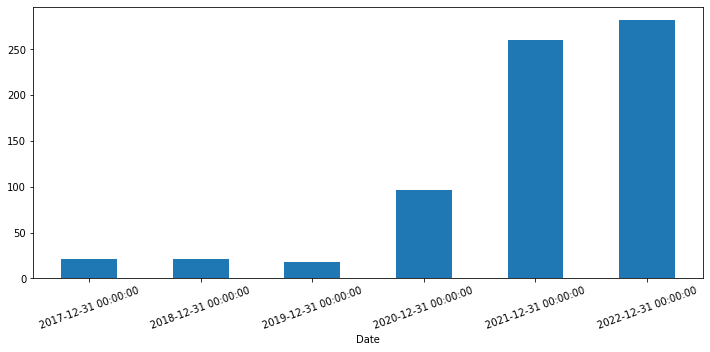

In [33]:
#plotting
plt.figure(figsize = (12,5))
df_tesla['Open'].resample(rule ='A').mean().plot(kind = 'bar')
plt.xticks(rotation = 20)

<AxesSubplot:xlabel='Date'>

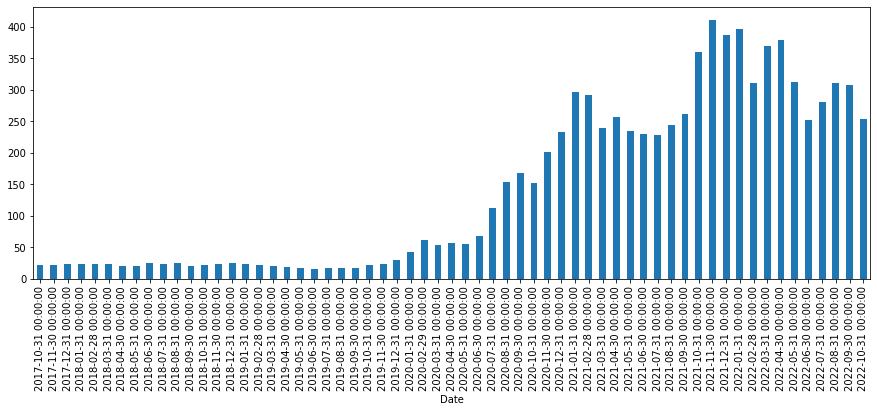

In [34]:
df_tesla['Open'].resample(rule ='M').max().plot.bar(figsize = (15,5))

### Rolling

In [35]:
df_tesla['High'].rolling(10).mean().head(20)

Date
2017-10-31          NaN
2017-11-01          NaN
2017-11-02          NaN
2017-11-03          NaN
2017-11-06          NaN
2017-11-07          NaN
2017-11-08          NaN
2017-11-09          NaN
2017-11-10          NaN
2017-11-13    20.866733
2017-11-14    20.762733
2017-11-15    20.628600
2017-11-16    20.691600
2017-11-17    20.827733
2017-11-20    20.881067
2017-11-21    20.959267
2017-11-22    21.029467
2017-11-24    21.109133
2017-11-27    21.169000
2017-11-28    21.190333
Name: High, dtype: float64

In [36]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(10).mean()

In [37]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Open:10 days rolling
Date,,,,,,,
2017-10-31,22.129999,21.345333,21.348667,22.101999,85084500.0,22.101999,NaN
2017-11-01,22.174000,21.350668,22.150000,21.405333,126859500.0,21.405333,NaN
2017-11-02,20.579332,19.508667,20.008667,19.950666,296871000.0,19.950666,NaN
2017-11-03,20.416668,19.675333,19.966667,20.406000,133410000.0,20.406000,NaN
2017-11-06,20.500000,19.934000,20.466667,20.185333,97290000.0,20.185333,NaN


<AxesSubplot:xlabel='Date'>

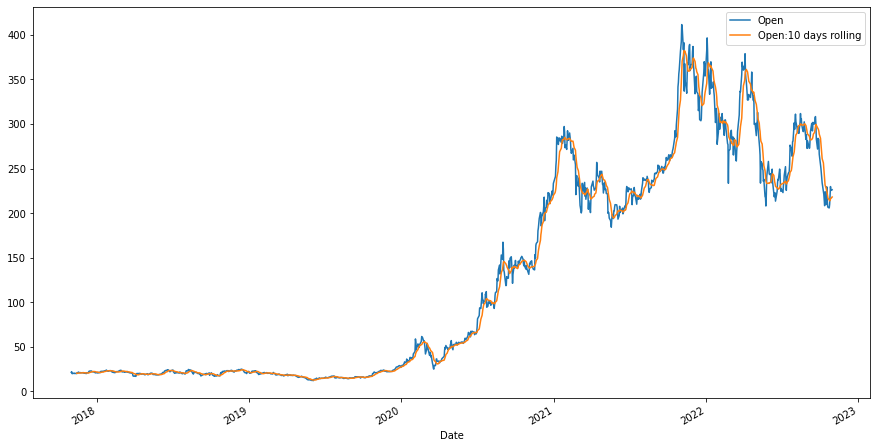

In [38]:
df_tesla[['Open','Open:10 days rolling']].plot(figsize = (15,8))